<a href="https://colab.research.google.com/github/MOODesign/Yolov3_object_detection/blob/master/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv3 Object Detector with Darknet in the Cloud!
                                                                                
In this toturial you'll learn how to detect objects in a image using Yolov3 pretrained model. And you'll learn how to train your own model to detect any object of your choice.

#Step 1: Running a GPU inside Google Colab

To use a GPU in colab you need to select the runtime menu on the top left and then click on change runtime type. Within the popup window select GPU and hit save. By hovering over the Ram & Disk icons on the top right you should see "python 3 Google Compute Engine backend (GPU)".

# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14086 (delta 0), reused 1 (delta 0), pack-reused 14078
Receiving objects: 100% (14086/14086), 12.79 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (9578/9578), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify that CUDA drivers are installed.
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-29 09:26:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   477KB/s    in 19m 11s 

2020-07-29 09:45:26 (210 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
# a helper function to show images inside colab.
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Step 4: Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detect <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

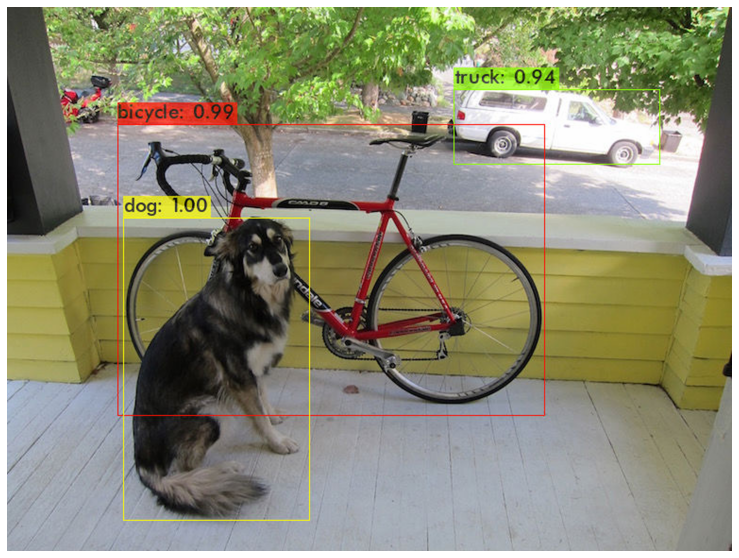

In [7]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')



---


# Training a Custom YOLOv3 Object Detector in the Cloud!
Now comes the fun part! It is time to create your very own custom object detector, all within the cloud for free! The options are endless for what objects/classes you can make your detector detect. So think of something creative or just follow along with what I create. It is up to you!

This requires a couple tricks and tips so make sure to follow along closely with the rest of the tutorial.

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


# Step 1: Gathering and Labeling a Custom Dataset
In order to create a custom object detector you need a good dataset of images and labels so that the detector can be efficiently be trained to detect objects.

This can be done in two ways. through using Google images or through creating your own dataset and using an annotation tool to manually draw labels. **(I recommend the first way!)**

### Using Google's Open Images Dataset (RECOMMENDED)
This method is the method I recommend as you can gather thousands of images and auto-generate their labels within minutes! Gathering a dataset from Google's Open Images Dataset and using OIDv4 toolkit to generate labels is easy and time efficient. The dataset contains labeled images for over 600 classes! [Explore the Dataset Here!](https://storage.googleapis.com/openimages/web/index.html)


For this tutorial I will be creating a car license plate object detector using data from Google's Open Images Dataset. I ran the following commands within the toolkit.
```
python main.py downloader --classes Vehicle registration plate --type_csv train --limit 1000 --multiclasses 0
```
Note: Use --multiclasses 1 if you are training to detect more than one class.
This creates a folder with 1000 images for vehicles with registration plate labeled.

Within the root OIDv4_ToolKit folder open the file classes.txt and edit it to have the classes you just downloaded, one per line if you have more than one class.

Now convert the image annotations:
```
python convert_annotations.py
```
This converts all labels to YOLOv3 format which can now be used by darknet to properly train our custom object detector.

The folder with all your images and annotations should have each image and a text file with the same name.
## You have sucessfully generated a custom YOLOv3 dataset! Congrats!

In [8]:
cd /content/

/content


In [9]:
#Clone my repo with all the needed files inside.
!git clone https://github.com/MOODesign/OIDv4_ToolKit

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 438 (delta 5), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (438/438), 34.09 MiB | 27.47 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [10]:
cd /content/OIDv4_ToolKit

/content/OIDv4_ToolKit


In [11]:
#install the requirements for the IOD tool.
!pip install -r requirements.txt

     |████████████████████████████████| 1.3MB 5.6MB/s 
     |████████████████████████████████| 6.4MB 51.7MB/s 
  Created wheel for awscli: filename=awscli-1.18.107-py2.py3-none-any.whl size=3283837 sha256=5cdb8e64e871bf64f77a202c090a21c94de7b2e1e63a9a930ba0d39a45656c11
  Stored in directory: /root/.cache/pip/wheels/6e/6a/8a/485442603a5ee2d496f76ba858b20516287783b42939b6c77c
Successfully built awscli
  Found existing installation: botocore 1.17.24
    Uninstalling botocore-1.17.24:
      Successfully uninstalled botocore-1.17.24
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


This cell downloads images from OpenImagesDatabase. Change classes names to your desired class with spaces between each class.
Add  --multiclasses 1 if you're training more than one class.

In [12]:
#Start downloading images.type "y" if you encounter an error that files are missing.
!python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1000


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Vehicle registration plate.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 57602 KB/s, 0 seconds passed

Change the name of the images folder to "obj" for easier call.

In [13]:
!mv '/content/OIDv4_ToolKit/OID/Dataset/train/Vehicle registration plate' '/content/OIDv4_ToolKit/OID/Dataset/train/obj'

>Inside OIDv4_Toolkit folder change classes.txt to your specified classes, if you're training for multiple classes then add them one per line.

Run the convert_annotaions.py file to change the annotation into yolov3 format.

In [14]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  obj
100% 1000/1000 [00:19<00:00, 51.19it/s]


Copy the data folder into darknet directory.

In [15]:
!cp -R '/content/OIDv4_ToolKit/OID/Dataset/train/obj/.' /content/darknet/data/obj

Copy obj.data and obj.names to /darknet/data,
generate_train.py to /darknet,
and custom configurations to /darknet/cfg.

In [16]:
!cp /content/OIDv4_ToolKit/obj.data /content/darknet/data
!cp /content/OIDv4_ToolKit/obj.names /content/darknet/data
!cp /content/OIDv4_ToolKit/generate_train.py /content/darknet
!cp /content/OIDv4_ToolKit/yolov3_custom.cfg /content/darknet/cfg
!cp /content/OIDv4_ToolKit/yolov3_custom_test.cfg /content/darknet/cfg

# Step 3: Configuring Files for Training
Double click custom obj.data and obj.names to edit. 
The obj.data file contains the number of classes you're training, some file destinations ( leave unchanged) and the backup location for the new model which is google drive ( will get to that in a min).

## i) yolov3_custom.cfg File
Double click on it to change it's contents, I recommend having batch = 64 and subdivisions = 16 for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

Note: I set my max_batches = 10000, steps = 8000, 9000, I changed the classes = 1 in the three YOLO layers and filters = 18 in the three convolutional layers before the YOLO layers.
Calculate the number of filter based on this formula: filters = (classes+5)*3

## ii) obj.names and obj.data
Edit **obj.names** file and you will make this file exactly the same as your classes.txt , every class on a new line.

You will also edit the **obj.data** file (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

Luckily I have created a script that generates train.txt for us.

In [17]:
cd /content/darknet

/content/darknet


In [18]:
!python generate_train.py

In [19]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


If everything went as planned double click on **darknet/data/train.txt** on the left side File Explorer and it should look like this.
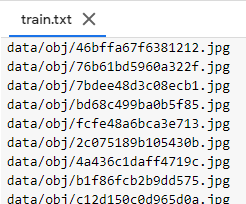

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your model converge and be accurate way faster. USE IT!

In [20]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-07-29 10:16:05--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   491KB/s    in 8m 52s  

2020-07-29 10:24:58 (298 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Mounting Google Drive
This step will mount your google drive as we'll need it to save the training backup.
After running the cell click on the link, log in to your google account, copy the verification code and paste it here.

In [21]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [22]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 66.jpg		   'My Paper'		   Plate_detect_and_recognize
 APK		   'My resume'		   Programming
 backup		    PandoraBox_prototype   Samples
'Colab Notebooks'   Pictures		   Yolo
 Miscellaneous	   'Pitch Deck.pptx'	   YOLOv3_colab_training.ipynb


In [23]:
cd /content/darknet/

/content/darknet


# Now let's train the new object detector.

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Training takes a long time, for my case it took about 9 or 10 hours.
You might lose connection to colab or run out of RAM.
That's why the model saves it's weights every 100 iteration and that's why we saved the weights on google drive.
You can start training from whenever you stopped again with this command.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/backup/yolov3_custom_last.weights -dont_show

# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 B

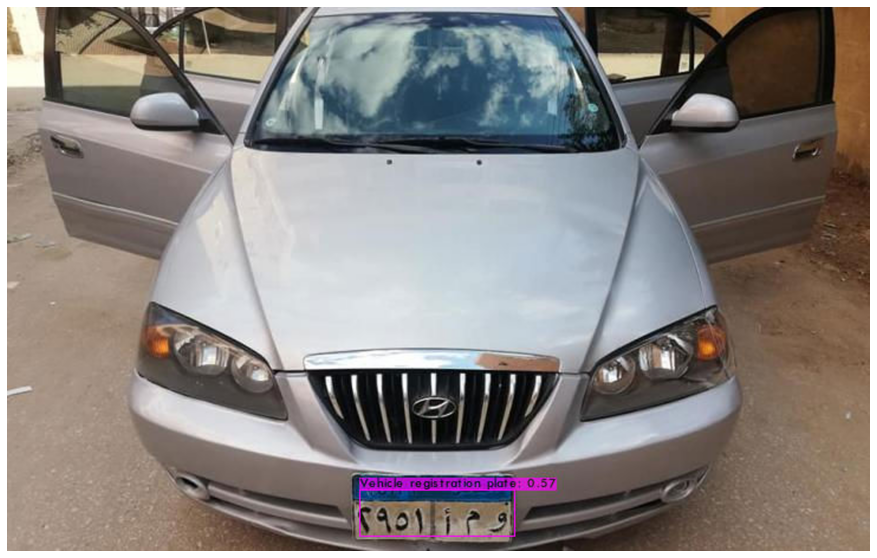

In [27]:
# run your custom detector with this command (upload an image to test).
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /mydrive/backup/yolov3_custom_last.weights /content/OIDv4_ToolKit/test.jpg -thresh 0.3
imShow('predictions.jpg')

# Thanks!
Thanks for following along this tutorial, I hope it worked well for all of you!

Consider Subscribing to my Youtube channel
[SuperUser](https://www.youtube.com/channel/UCE3fUdP54-Uysww-fmPG2lw?view_as=subscriber)